# Ibraheem Al-Yousef PHY373

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def fit_data(func, xdata, ydata, p0=None):
    """
    Fits a function to a set of data points using least squares optimization.

    Parameters:
    func : callable
        The function to be fitted to the data.
    xdata : array_like
        The x data points.
    ydata : array_like
        The y data points.
    p0 : array_like, optional
        An initial guess for the function parameters.

    Returns:
    popt : ndarray
        The optimal values for the function parameters.
    pcov : ndarray
        The estimated covariance of popt.
    rms : float
        The root mean square error between the fitted function and the data.
    """
    popt, pcov = curve_fit(func, xdata, ydata, p0=p0)
    yfit = func(xdata, *popt)
    plt.scatter(xdata, ydata, color='k',label='Data')
    xdata=np.linspace(-2,1.5*np.max(xdata),100)
    yfit = func(xdata, *popt)
    plt.plot(xdata, yfit, 'r-',label='Model')
    plt.legend()
    #plt.plot(np.linspace(0,2*np.max(xdata),100), func(np.linspace(0,10,100), *popt), 'r-')
    plt.show()
    return popt, pcov

## Q1): Solving with two methods:
### 1- Least square fit:

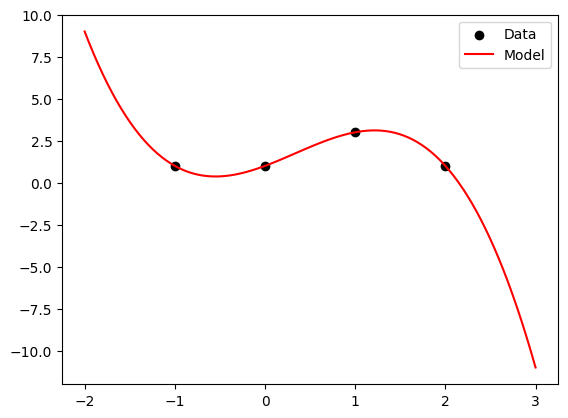

Optimal values for parameters: a0= -1.00; a1= 1.00; a2= 2.00; a3= 1.00


In [6]:
# Define the function to be fitted
def my_func(x, a,b,c,d):
    return a*x**3+b*x**2+c*x+d

# Provide data points
xdata = np.array([-1,0,1,2])
ydata = np.array([1,1,3,1])

# Call the fit_data function to fit the data to the function
popt, pcov = fit_data(my_func, xdata, ydata)

# Print the optimal values for the function parameters and the RMS error
print("Optimal values for parameters: a0= %.2f; a1= %.2f; a2= %.2f; a3= %.2f" %(popt[0],popt[1],popt[2],popt[3]))
f=lambda x: popt[0]*x**3+popt[1]*x**2+popt[2]*x+popt[3]

### 2- Solving 4 equations with 4 unknowns:

The solution polynomial is: 


Eq(p(x), -x**3 + x**2 + 2*x + 1)

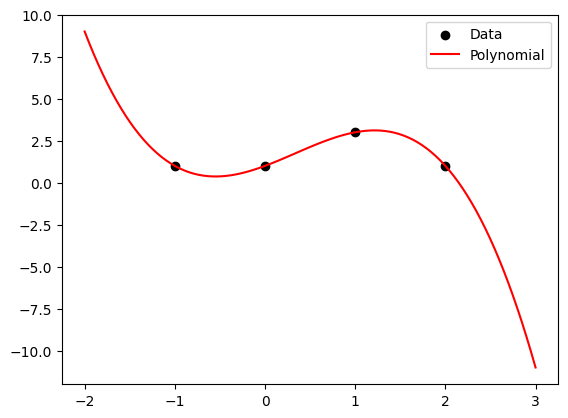

In [3]:
a0, a1, a2, a3, x, f = sp.symbols('a0 a1 a2 a3 x f')

p = a0*x**3 + a1*x**2 + a2*x + a3
eq1 = sp.Eq(p.subs(x, -1), 1)
eq2 = sp.Eq(p.subs(x, 0), 1)
eq3 = sp.Eq(p.subs(x, 1), 3)
eq4 = sp.Eq(p.subs(x, 2), 1)

sol = sp.solve([eq1, eq2, eq3, eq4], [a0, a1, a2, a3])

a0_val = sol[a0]
a1_val = sol[a1]
a2_val = sol[a2]
a3_val = sol[a3]

# Plot the polynomial
x_vals = np.linspace(-2, 3, 100)
y_vals = a0_val*x_vals**3 + a1_val*x_vals**2 + a2_val*x_vals + a3_val
f = sp.Function('p')(x)
print('The solution polynomial is: ')
display(sp.Eq(f,p.subs(a0,a0_val).subs(a1,a1_val).subs(a2,a2_val).subs(a3,a3_val)))
# Plot the points
points_x = [-1, 0, 1, 2]
points_y = [1, 1, 3, 1]
plt.scatter(points_x, points_y, color='black', label='Data')
plt.plot(x_vals, y_vals, label='Polynomial', color='red')
plt.legend()
plt.show()

## Q2):

Divided difference table:
[[-5.          3.         -0.66666667 -0.33333333]
 [ 1.          1.         -2.          0.        ]
 [ 2.         -3.          0.          0.        ]
 [-1.          0.          0.          0.        ]]
Polynomial expression:


Eq(p(x), -0.333333333333333*x**3 - 1.0*x**2 + 2.33333333333333*x + 1.0)

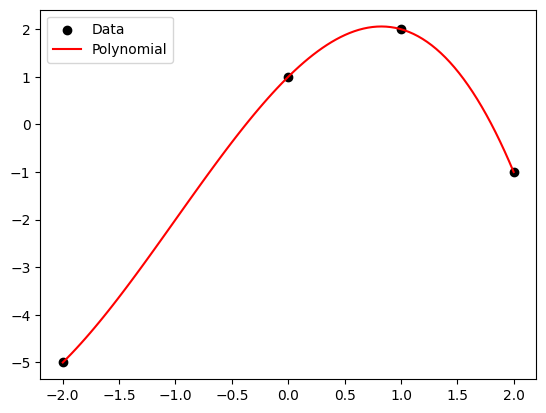

In [4]:
def divided_difference(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1, n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1])/(x[i+j] - x[i])
    
    return coef


# Example usage
x = [-2, 0, 1, 2]
y = [-5, 1, 2, -1]
coef = divided_difference(x, y)

p=lambda xa: coef[0][0]+coef[0][1]*(xa-x[0])+coef[0][2]*(xa-x[1])*(xa-x[0])+coef[0][3]*(xa-x[2])*(xa-x[1])*(xa-x[0])
print("Divided difference table:")
print(coef)
print("Polynomial expression:")
h= sp.symbols('x')
f = sp.Function('p')(h)
display(sp.Eq(f,p(h).simplify()))
x_plot = np.linspace(-2, 2, 100)
y_plot = p(x_plot)

# Plot data points and polynomial
plt.scatter(x, y, label='Data',color='k')
plt.plot(x_plot, y_plot, label='Polynomial',color='red')
plt.legend()
plt.show()


## Q3):

Polynomial expression:


Eq(p(x), -5*x**4/8 + 59*x**3/12 - 95*x**2/8 + 115*x/12 + 1)

Eq(p(0.5), 3.3984375)

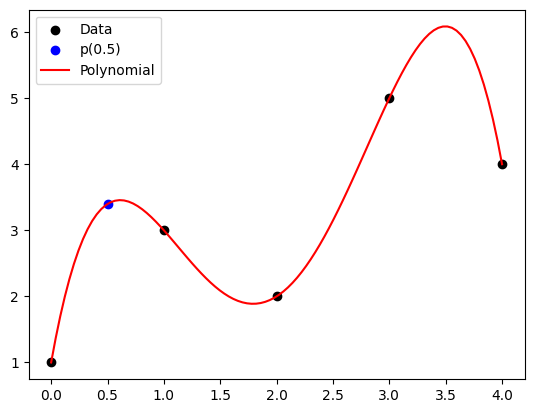

In [5]:
def lagrange_interpolation_symbolic(x, y):
    """
    Symbolic Lagrange interpolation algorithm for estimating f(x) given x and y.
    """
    n = len(x)
    xi = sp.symbols('x')
    yi = 0
    for i in range(n):
        li = 1
        for j in range(n):
            if i != j:
                li *= (xi - x[j]) / (x[i] - x[j])
        yi += y[i] * li
    return yi

# Define the known points
x = [0, 1, 2,3,4]
y = [1, 3,2,5,4]

# Define the variable and the expression
xi = sp.symbols('x')
f = sp.Function('p')(xi)
expr = sp.Eq(f, lagrange_interpolation_symbolic(x, y))
# Evaluate the expression at a particular point
expr.simplify()

fx=sp.lambdify(xi, lagrange_interpolation_symbolic(x, y), "numpy")
x_plot = np.linspace(0, 4, 100)
y_plot = fx(x_plot)
print("Polynomial expression:")
display(expr.simplify())
display(expr.simplify().subs(xi,0.5))
# Plot data points and polynomial
plt.scatter(x, y, label='Data',color='k')
plt.scatter(0.5, fx(0.5), label='p(0.5)',color='b')
plt.plot(x_plot, y_plot, label='Polynomial',color='red')
plt.legend()
plt.show()


